# Symbolic calculation

In [1]:
import sympy
from sympy import cos, sin
sympy.init_printing()

In [234]:
x0, y0, alpha0 = sympy.symbols("x_0, y_0, alpha_0")
x, y = sympy.symbols("x, y")
l, l1, l2, l3 = sympy.symbols("l, l_1, l_2, l_3")
r1, r2, r3, r4 = sympy.symbols("r_1, r_2, r_3, r_4")
r01, r02, r03, r04 = sympy.symbols("r0_1, r0_2, r0_3, r0_4")
# l_1 - distance between center and 1, 2 sensors
# l_2 - distance along y axes from center to 3, 4 sensors
# l - side of cubes
L_x = sympy.Equality(sin(alpha0) * (x - x0) + cos(alpha0) * (y - y0), 0)
L_y = sympy.Equality(cos(alpha0) * (x - x0) + sin(alpha0) * (y - y0), 0)

In [235]:
x1, y1 = x0 + cos(alpha0) * 3 * l / 2, y0 + sin(alpha0) * 3 * l / 2
x2, y2 = x0 - cos(alpha0) * 3 * l / 2, y0 - sin(alpha0) * 3 * l / 2
x3, y3 = x0 - sin(alpha0) * l / 2, y0 + cos(alpha0) * l / 2
L1 = sympy.Equality(cos(alpha0) * (x - x1) + sin(alpha0) * (y - y1), 0)
L2 = sympy.Equality(cos(alpha0) * (x - x2) + sin(alpha0) * (y - y2), 0)
L3 = sympy.Equality(-sin(alpha0) * (x - x3) + cos(alpha0) * (y - y3), 0)

In [236]:
r_c = [None, None, None, None]

In [237]:
r_c[0] = r01 + 3 * l / 2 - sympy.solve(L1.subs(y, 0), x)[0]
r_c[3] = r04 + 3 * l / 2 + sympy.solve(L2.subs(y, 0), x)[0]

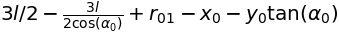

In [238]:
r_c[0]

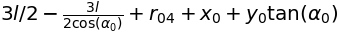

In [239]:
r_c[3]

In [240]:
r_c[1] = r02 + l / 2 - sympy.solve(L3.subs(x, l2), y)[0]
r_c[2] = r03 + l / 2 - sympy.solve(L3.subs(x, -l2), y)[0]

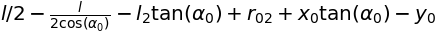

In [241]:
r_c[1]

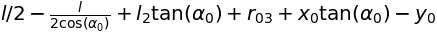

In [242]:
r_c[2]

In [243]:
r0s = [r01, r02, r03, r04]

In [244]:
r_f = [sympy.lambdify((x0, y0, alpha0, l, l2, y_), x_) for x_, y_ in zip(r_c, r0s)]

In [312]:
for i in range(4):
    print(r_c[i])

3*l/2 - 3*l/(2*cos(alpha_0)) + r0_1 - x_0 - y_0*tan(alpha_0)
l/2 - l/(2*cos(alpha_0)) - l_2*tan(alpha_0) + r0_2 + x_0*tan(alpha_0) - y_0
l/2 - l/(2*cos(alpha_0)) + l_2*tan(alpha_0) + r0_3 + x_0*tan(alpha_0) - y_0
3*l/2 - 3*l/(2*cos(alpha_0)) + r0_4 + x_0 + y_0*tan(alpha_0)


## Linear case

In [246]:
init_params = [(x0, 0), (y0, 0), (alpha0, 0)]
A_c = sympy.Matrix([[sympy.diff(expr, x_).subs(init_params) for expr in r_c]
              for x_ in [x0, y0, alpha0]]).T
A_c

⎡-1  0    0 ⎤
⎢           ⎥
⎢0   -1  -l₂⎥
⎢           ⎥
⎢0   -1  l₂ ⎥
⎢           ⎥
⎣1   0    0 ⎦

In [247]:
A = sympy.lambdify(l2, A_c)

In [248]:
A_common = sympy.simplify(sympy.Matrix([[sympy.diff(expr, x_) for expr in r_c]
              for x_ in [x0, y0, alpha0]]).T)
A_common = sympy.lambdify((x0, y0, alpha0, l, l2), A_common)

## Second order case

In [249]:
A2_c = [None, None, None, None]
for i in range(4):
    A2_c[i] = sympy.Matrix([[sympy.diff(r_c[i], x_, y_).subs(init_params) for x_ in 
                          [x0, y0, alpha0]] for y_ in [x0, y0, alpha0]]).T
A2_c

⎡⎡0  0     0  ⎤  ⎡0  0   1 ⎤  ⎡0  0   1 ⎤  ⎡0  0    0  ⎤⎤
⎢⎢            ⎥  ⎢         ⎥  ⎢         ⎥  ⎢           ⎥⎥
⎢⎢0  0    -1  ⎥  ⎢0  0   0 ⎥  ⎢0  0   0 ⎥  ⎢0  0    1  ⎥⎥
⎢⎢            ⎥, ⎢         ⎥, ⎢         ⎥, ⎢           ⎥⎥
⎢⎢       -3⋅l ⎥  ⎢      -l ⎥  ⎢      -l ⎥  ⎢      -3⋅l ⎥⎥
⎢⎢0  -1  ─────⎥  ⎢1  0  ───⎥  ⎢1  0  ───⎥  ⎢0  1  ─────⎥⎥
⎣⎣         2  ⎦  ⎣       2 ⎦  ⎣       2 ⎦  ⎣        2  ⎦⎦

## Itarative method

# Numeric 

In [251]:
import scipy.optimize
import numpy as np

In [252]:
l = 58
l2 = 125 / 2
r0s = np.array([35, 85, 85, 35])
rs = np.array([5, 95, 75, 55])

In [314]:
rs1 = np.array([r_f[i](20, 40, 0.15, l, l2, r0s[i]) for i in range(4)])
rs = rs1

In [315]:
def fun(X, l, l2, r0s, rs):
    return np.array([f_(X[0], X[1], X[2], l, l2, r0_) - r_ for f_, r0_, r_
                     in zip(r_f, r0s, rs)])

In [316]:
fun([0, 0, 0], l, l2, r0s, rs)

array([ 27.03341923,  46.75258361,  27.86068135, -25.05739821])

In [317]:
X_true = scipy.optimize.least_squares(fun, np.array([0, 0, 0]), 
                             bounds=[(-30, -30, -np.pi / 6), (30, 30, np.pi / 6)], 
                             args=[l, l2, r0s, rs]).x
X_true.round(3)

array([21.441, 30.   ,  0.116])

## Linear case

In [318]:
A(l2)

array([[ -1. ,   0. ,   0. ],
       [  0. ,  -1. , -62.5],
       [  0. ,  -1. ,  62.5],
       [  1. ,   0. ,   0. ]])

In [319]:
A_r = np.linalg.lstsq(A(l2), np.eye(4), rcond=None)[0]
A_r.round(4)

array([[-0.5  ,  0.   ,  0.   ,  0.5  ],
       [ 0.   , -0.5  , -0.5  ,  0.   ],
       [ 0.   , -0.008,  0.008,  0.   ]])

In [320]:
X = A_r.dot((rs - r0s)[:, np.newaxis])[:, 0]
X.round(3)

array([26.045, 37.307,  0.151])

## Iterative

In [321]:
df1 = fun(X, l, l2, r0s, rs)
X = [0, 0, 0]
for i in range(3):
    f = fun(X, l, l2, r0s, rs)
#     A_r = A_common(X[0], X[1], X[2], l, l2)
#     A_r = np.linalg.lstsq(A_r, np.eye(4), rcond=None)[0]
    dX = A_r.dot(f[:, np.newaxis])[:, 0]
    X = X - dX
X

array([19.85919783, 40.05454498,  0.1500006 ])

# Movement

In [322]:
def get_movement(point):
    x, y, a = point
    R = np.sqrt(x ** 2 + y ** 2) / 2 / np.sin(a / 2)
    S = R * a
    angle = np.arctan2(y, x) + np.pi - a / 2
    return np.array([S * np.cos(angle), S * np.sin(angle), a])

In [323]:
get_movement(np.array(X))

array([-22.8260504 , -38.48996817,   0.1500006 ])

# Test movements on robot

In [22]:
import sys
sys.path.insert(0, r"/home/mikhail/catkin_ws/src/ros-eurobot-2018/eurobot/scripts/stm_node")
import STMprotocol
import serial
import time

In [27]:
protocol = STMprotocol.STMprotocol("/dev/ttyUSB0")

In [47]:
protocol.pure_send_command(0x01, [c for c in 'ECHO'])

error: required argument is not an integer

In [55]:
ser = serial.Serial("/dev/ttyACM4", timeout=0.02)

In [56]:
rs = r0s
ser.reset_input_buffer()
for i in range(10):
    s = ser.readline()
    print(s)
    try:
        sensors1 = np.array(list(map(int, s.split())))
    except ValueError:
        sensors1 = r0s
    try:
        rs_1 = rs * 0.7 + sensors1 * 0.3
    except ValueError:
        pass
    else:
        rs = rs_1
    time.sleep(0.01)
    print(rs)

b'81 20 \r\n'
[35 85 85 35]
b'41 94 83 18 \r\n'
[36.8 87.7 84.4 29.9]
b'42 94 80 19 \r\n'
[38.36 89.59 83.08 26.63]
b'41 94 81 19 \r\n'
[39.152 90.913 82.456 24.341]
b'41 92 80 20 \r\n'
[39.7064 91.2391 81.7192 23.0387]
b'41 95 81 21 \r\n'
[40.09448 92.36737 81.50344 22.42709]
b'43 93 81 19 \r\n'
[40.966136 92.557159 81.352408 21.398963]
b'42 95 83 19 \r\n'
[41.2762952 93.2900113 81.8466856 20.6792741]
b'41 93 81 19 \r\n'
[41.19340664 93.20300791 81.59267992 20.17549187]
b'42 97 84 19 \r\n'
[41.43538465 94.34210554 82.31487594 19.82284431]


In [26]:
r0s = rs
r0s

array([34.85098836, 83.39739216, 93.39310996, 26.95671366])

In [35]:
r0s

array([30.52341561, 89.57029471, 79.43071849, 25.68300547])

In [53]:
point = scipy.optimize.least_squares(fun, np.array([0, 0, 0]), 
                             bounds=[(-50, -50, -np.pi / 6), (50, 50, np.pi / 6)], 
                             args=[l, l2, r0s, rs]).x
point

array([-4.99999696e+01, -9.48848562e-01, -2.36393793e-02])

In [54]:
get_movement(point)

array([ 4.99864260e+01,  1.53978850e+00, -2.36393793e-02])

In [32]:
x, y, w, sx, sy, sw = 0, 0, 0, 0, 0, 0
protocol.send_command(0xa2, [x, y, w, sx, sy, sw])

Exception:	 ord() expected string of length 1, but int found
At time:	 2018-02-12 20:09:56.163191
--------------------------


(False, None)